In [1]:
import pandas as pd
import numpy as np
import setup_jwlab
from jwlab.constants import cleaned_data_filepath

from jwlab.cluster_analysis_perm import cluster_analysis_procedure
# from jwlab.ml_prep_perm import load_ml_data, slide_df, average_trials, average_trials_and_participants, no_average
# from jwlab.bad_trials import get_bad_trials, get_left_trial_each_word
# from jwlab.participants_map import map_participants
# from jwlab.constants import word_list, bad_trials_filepath, old_participants, cleaned_data_filepath

from sklearn.svm import SVC
from sklearn.model_selection import cross_validate, RepeatedKFold
from scipy import stats
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt


In [2]:
# Argument 1: 9 or 11 (month olds)
# Argument 2: Boolean, True to randomize the labels, False otherwise
# Argument 3: averaging, could be: no_averaging, average_trials, average_trials_and_participants, permutation
# Argument 4: sliding_window_config[start_time, end_time, window_lengths[], step_length]
# Argument 5: cross_val_config[num_fold, num_iterations]

#cluster_analysis_procedure(9, False, "permutation", [-200, 1000, [10, 20, 40, 60], 10], [3, 5])

Valid windows are: [7, 8, 10, 11, 12, 45, 46, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 113, 114, 115, 116, 117, 118, 119]

Clusters are: [[-100, -90, -80], [330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450], [470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790], [930, 940, 950, 960, 970, 980, 990]]

The max t mass is: 516.1022858344065



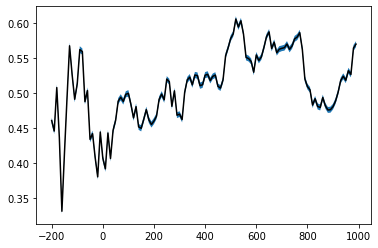

In [3]:
results = cluster_analysis_procedure(11, False, "permutation", [-200, 1000, [10], 10], [3, 15, 20])

In [15]:
#t-test function
num_win= 120

pvalues = []
tvalues_pos = []
tvalues_neg = []
for i in range(len(results)):
    for j in range(num_win):
        # change the second argument below for comparison
        istat = stats.ttest_1samp(results[i][j], .5)
        pvalues += [istat.pvalue] if istat.statistic > 0 else [1]
        # removed just so that we can get the negative value from the pre window
        tvalues_pos += [istat.statistic] if istat.statistic > 0 else [0]
        tvalues_neg += [istat.statistic] if istat.statistic < 0 else [0]

In [16]:
#find clusters
pvalues

[1,
 1,
 6.914771267929041e-05,
 1,
 1,
 1,
 1,
 9.190759442330417e-38,
 3.3881264410100932e-09,
 0.09503131227004123,
 0.3995246343875053,
 2.0196476005621932e-32,
 3.3998448401696954e-19,
 1,
 0.3855806629726459,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0.6223134922258999,
 1,
 0.04241474267568173,
 0.06301045683646099,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5.293522684899148e-05,
 1.8930531944908511e-06,
 1,
 0.0012078321486166086,
 1,
 1,
 1,
 1,
 0.12035373071406207,
 0.05575272561808348,
 0.503327958514088,
 0.0001268201188408457,
 0.008461969548588058,
 0.2490553449809654,
 0.0001498423114636527,
 0.0016746111306126304,
 1.3176794233684631e-08,
 0.005724954502209501,
 7.57646865494428e-06,
 1.166989236931271e-13,
 0.49038698476022624,
 0.918106697305038,
 0.0020000707641934,
 5.510425316096135e-16,
 8.816784442912552e-32,
 1.2332356834930765e-50,
 1.6218814349803765e-46,
 3.153669851462507e-53,
 1.9379743974413613e-33,
 5.1975636420298633e-42,
 5.170366

In [20]:
print(np.mean(results[0][0]))
print(np.mean(results[0][1]))
print(np.mean(results[0][2]))
print(np.mean(results[0][3]))
print(np.mean(results[0][4]))
print(np.mean(results[0][5]))
print(np.mean(results[0][6]))
print(np.mean(results[0][7]))
print(np.mean(results[0][8]))
print(np.mean(results[0][9]))
print(np.mean(results[0][10]))
print(np.mean(results[0][11]))

0.4742424242424242
0.45888888888888885
0.5210101010101009
0.4237373737373737
0.33303030303030307
0.42656565656565654
0.49090909090909085
0.5804040404040404
0.5252525252525252
0.5087878787878787
0.5206060606060605
0.572020202020202


In [28]:
tvalues = 0

istat = stats.ttest_1samp(results[0][3], .5)
print(istat.pvalue)
tvalues += istat.statistic

istat = stats.ttest_1samp(results[0][4], .5)
print(istat.pvalue)
tvalues += istat.statistic

istat = stats.ttest_1samp(results[0][5], .5)
print(istat.pvalue)
tvalues += istat.statistic

istat = stats.ttest_1samp(results[0][6], .5)
print(istat.pvalue)
tvalues += istat.statistic

print(tvalues)

1.8621613734618473e-65
3.741843906439948e-233
3.510082046799634e-59
0.03944610236548675
-83.24638727155535


In [2]:
# For null distribution
# MAKE SURE YOU TURN OFF PRINT FUNCTION

itr = 50 
arrTmass = []

for i in range(itr):
    tmass = cluster_analysis_procedure(11, True, "permutation", [-200, 1000, [10], 10], [3, 3, 2])
    arrTmass.append(round(tmass, 4))
    print(i)
print(arrTmass)

0
1
2


KeyboardInterrupt: 

In [ ]:


plt.hist(arrTmass, bins = 20)
plt.show()